# Advanced Topics in Python for Data Science
##### By Alyssa Harris
##### Wednesday, May 3 2017

In [3]:
"""
This python notebook is a modified version of:

Chapter 5 of the Pandas Jupyter Notebook cookbook

Which can be found here:

http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%205%20-%20Combining%20dataframes%20and%20scraping%20Canadian%20weather%20data.ipynb
"""


url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=54067&Year=2017&Month={}&Day=1&timeframe=1&submit=Download+Data"

In [4]:
url_to_use = url_template.format(30)
url_to_use

'http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=54067&Year=2017&Month=30&Day=1&timeframe=1&submit=Download+Data'

In [5]:
# OR
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=54067&Year={Year}&Month={Month}&Day=1&timeframe=1&submit=Download+Data"
url_to_use = url_template.format(Year=2017, Month=4)
url_to_use

'http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=54067&Year=2017&Month=4&Day=1&timeframe=1&submit=Download+Data'

In [6]:
import pandas as pd
# This line will error because of irregular lines, 
# but let's do it anyway to see the error
pd.read_csv(url_to_use)
# So now let's look at the CSV

CParserError: Error tokenizing data. C error: Expected 2 fields in line 17, saw 25


In [9]:
# Notice that what we really want is 16 rows later, 
# so let's skip the first 16 rows
april_2017=pd.read_csv(url_to_use, skiprows = 16, index_col = "Date/Time") #, parse_dates=True)
april_2017[:10]

,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2017-04-01 00:00,2017,4,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 01:00,2017,4,1,01:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 02:00,2017,4,1,02:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 03:00,2017,4,1,03:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 04:00,2017,4,1,04:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 05:00,2017,4,1,05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 06:00,2017,4,1,06:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01 07:00,2017,4,1,07:00,‡,-18.8,NaN,-24.6,NaN,61.0,...,NaN,24.1,NaN,102.26,NaN,NaN,NaN,NaN,NaN,Mainly Clear
2017-04-01 08:00,2017,4,1,08:00,‡,-18.6,NaN,-23.8,NaN,64.0,...,NaN,16.1,NaN,102.17,NaN,NaN,NaN,NaN,NaN,Blowing Snow


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


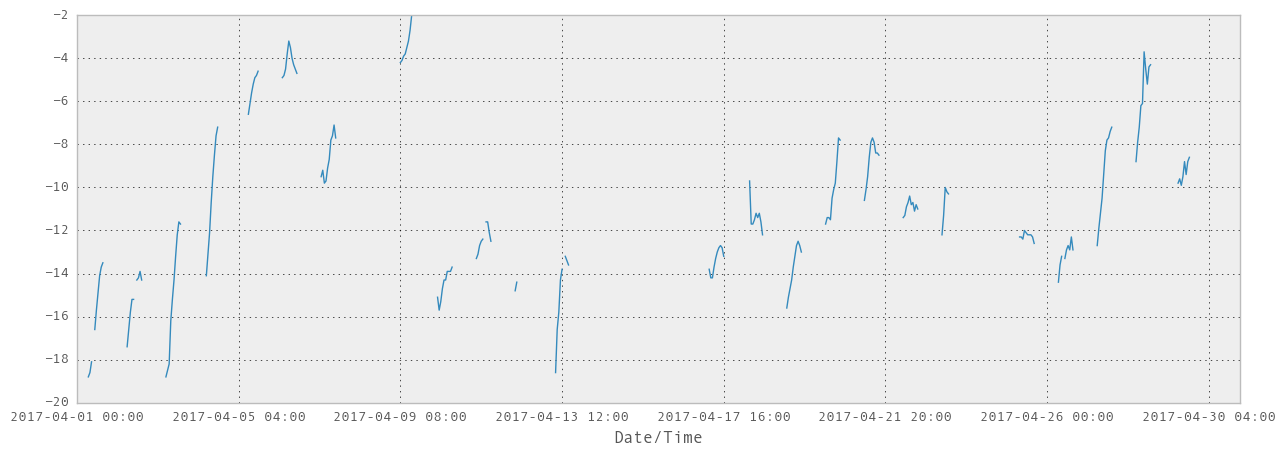

In [14]:
# Let's look at what the temperature is like:
# The following will error because it will be deprecated soon, 
# but for now it will still work fine
pd.set_option('display.mpl_style', 'default')
april_2017[u"Temp (\xb0C)"].plot(figsize=(15, 5))

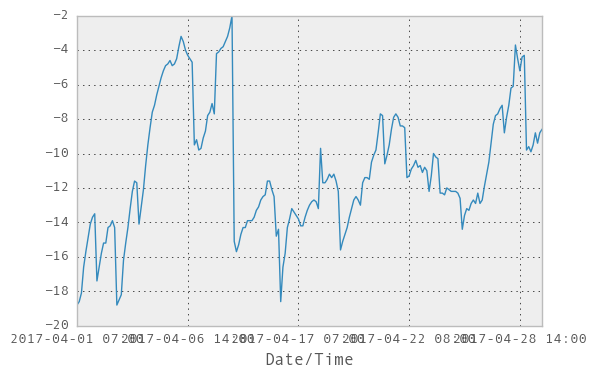

In [15]:
# We have a lot of missing data, 
# so if we're just interested in the overall trend, 
# let's temporarily get rid of those missing values

temp_series = april_2017[u"Temp (\xb0C)"].dropna()
temp_series.plot()

# So now this makes more sense and 
# we can see that there was a spike in the beginning of April,
# But other than that it has started off cold and slowly gotten warmer

In [8]:
# Now what if we wanted this data in Fahrenheit?
# Let's add a new column to our original data

april_2017[u"Temp (\xb0F)"]=april_2017[u"Temp (\xb0C)"]*9/5+32
april_2017[[u"Temp (\xb0F)", u"Temp (\xb0C)"]][10:20]

,Temp (°F),Temp (°C)
Date/Time,,
2017-04-01 10:00,NaN,NaN
2017-04-01 11:00,2.12,-16.6
2017-04-01 12:00,3.74,-15.7
2017-04-01 13:00,5.18,-14.9
2017-04-01 14:00,6.62,-14.1
2017-04-01 15:00,7.34,-13.7
2017-04-01 16:00,7.70,-13.5
2017-04-01 17:00,NaN,NaN
2017-04-01 18:00,NaN,NaN


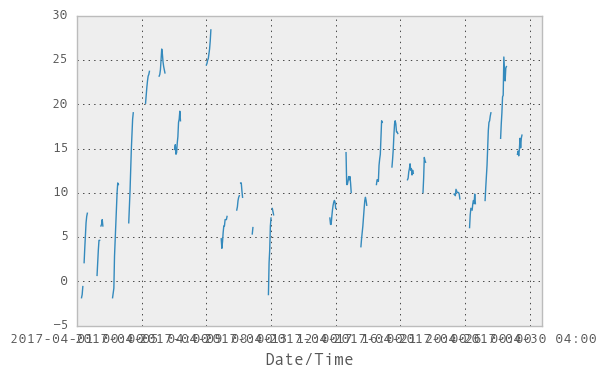

In [21]:
april_2017[u"Temp (\xb0F)"].plot()

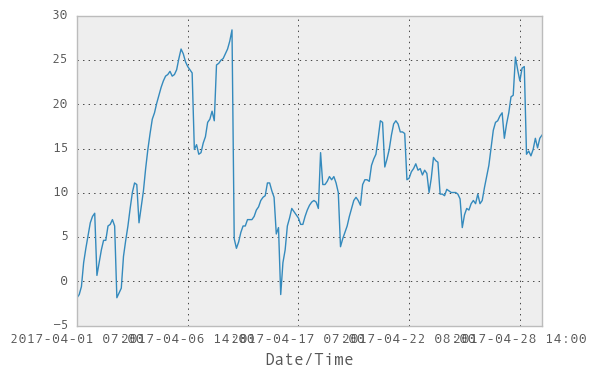

In [22]:
temp_series_F = april_2017[u"Temp (\xb0F)"].dropna()
temp_series_F.plot()

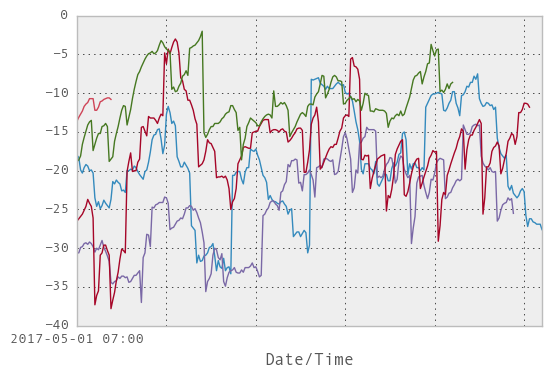

In [25]:
for month in [1,2,3,4,5]:
    url_to_use = url_template.format(Year=2017, Month=month)
    this_month = pd.read_csv(url_to_use, skiprows = 16, index_col = "Date/Time")
    this_month[u"Temp (\xb0C)"].dropna().plot()
    #break